In [83]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal

In [84]:
# PRVI ZADATAK
# a)
W= signal.lti([],[0,-5,-50],250)
w_log= np.logspace(-2,4,num=1000)
w, mag, phase= signal.bode(W,w=w_log)

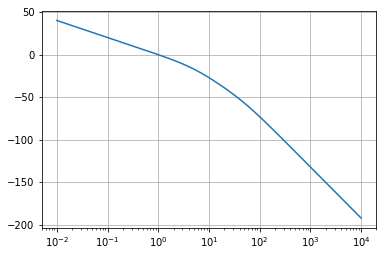

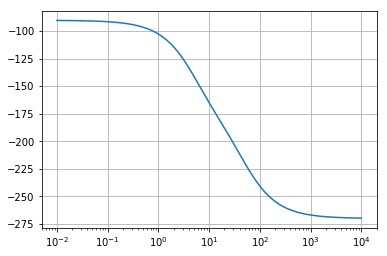

In [85]:
# a)
plt.figure()
plt.grid()
plt.semilogx(w,mag)
plt.figure()
plt.grid()
plt.semilogx(w,phase)
plt.show()

In [86]:
# b)
# Brzinska konstatna se racuna kao lim(s*W(s)) kada s->0
Kv= 1

In [87]:
# b)
# Presecna ucestanost pojacanja
w1= w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja: ",round(w1,3))
# Presecna ucestanost faze
w_pi= w[phase[:]>=-180][-1]
print("Presecna ucestanost faze: ",round(w_pi,3))
# Amplitudska margina
d= 1/10**((mag[phase[:]>=-180][-1])/20)
print("Amplitudska margina: ",round(d,3))
# Fazna margina
PM= 180+phase[mag[:]>=0][-1]
print("Fazna margina: ",round(PM,3))

Presecna ucestanost pojacanja:  0.973
Presecna ucestanost faze:  15.675
Amplitudska margina:  54.053
Fazna margina:  77.876


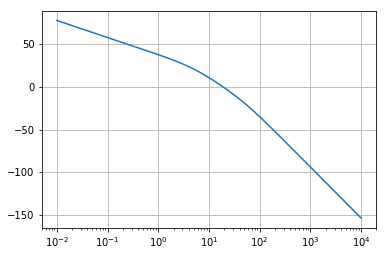

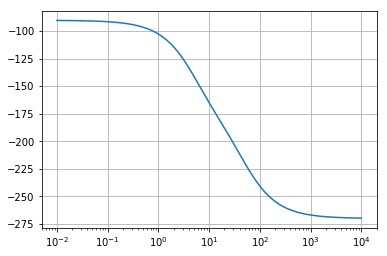

Presecna ucestanost pojacanja:  18.762
Fazna margina:  -5.645


In [88]:
# c) Kv>80 , PM>40
W= signal.lti([],[0,-5,-50],80*250)
w, mag, phase= signal.bode(W,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w,mag)
plt.figure()
plt.grid()
plt.semilogx(w,phase)
plt.show()
w1= w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja: ",round(w1,3))
PM= 180+phase[mag[:]>=0][-1]
print("Fazna margina: ",round(PM,3))

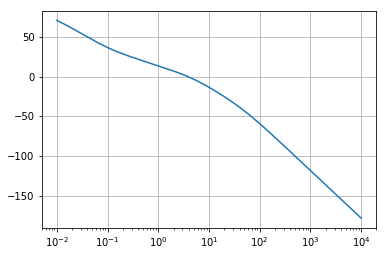

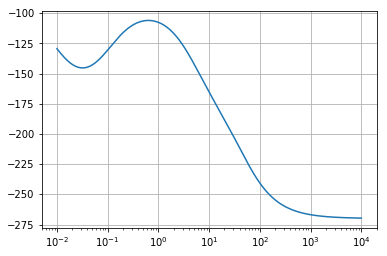

Presecna ucestanost pojacanja:  3.772
Fazna margina:  47.288


In [89]:
# Vidimo da je za brzinsku konstantu 80, fazna margina opala na -5 stepeni, sto znaci 
# da je moramo povecati za 45 stepni + 10 , odnosno 55.
# Uzimamo da je 1/alpha= 10
# D(s)=(s/z+1)/(s/p+1)=1/alpha(s+z)/(s+p)
p= 1/100
z= 1/10
W= signal.lti([-z],[0,-5,-50,-p],0.006*10*80*250)
# d)
w, mag, phase= signal.bode(W,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w,mag)
plt.figure()
plt.grid()
plt.semilogx(w,phase)
plt.show()
w1= w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja: ",round(w1,3))
PM= 180+phase[mag[:]>=0][-1]
print("Fazna margina: ",round(PM,3))

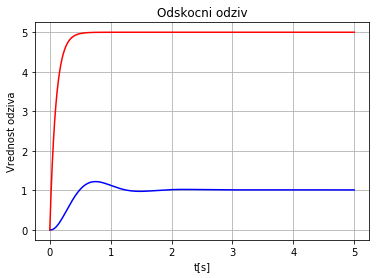

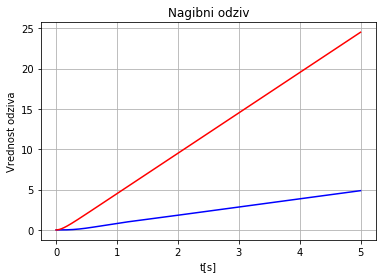

In [90]:
# e) G(s)= W(s)/1+W(s) , W(s)= 0.006*10*80*250(s+z)/s(s+5)(s+50)(s+p)
brojilac= [0.006*10*80*250, 0.006*10*80*250*z]
imenilac2= sp.convolve(sp.convolve(sp.convolve([1,0],[1,5]),[1,50]),[1,p])
imenilac= imenilac2+[0,0, 0, 0.006*10*80*250, 0.006*10*80*250*z]

W_komp= signal.lti(brojilac,imenilac)
W_nekomp= signal.lti([250],[0, 5, 50])

t= np.linspace(0,5,1000)

t1,y1= W_komp.step(T=t)
t2,y2= W_nekomp.step(T=t)
plt.figure()
plt.plot(t1,y1,'b')
plt.plot(t2,y2,'r')
plt.grid()
plt.title("Odskocni odziv")
plt.ylabel("Vrednost odziva")
plt.xlabel("t[s]")

t1,y1,x1= signal.lsim(W_komp,t,t)
t1,y2,x2= signal.lsim(W_nekomp,t,t)
plt.figure()
plt.plot(t1,y1,'b')
plt.plot(t2,y2,'r')
plt.grid()
plt.title("Nagibni odziv")
plt.ylabel("Vrednost odziva")
plt.xlabel("t[s]")
                      
plt.show()